<a href="https://colab.research.google.com/github/MohitV678573/express/blob/master/Dog_v_Cat_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:31<00:00, 43.5MB/s]
100% 1.06G/1.06G [00:32<00:00, 35.6MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
 #create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 62s 87ms/step - loss: 0.5891 - accuracy: 0.6776 - val_loss: 0.4759 - val_accuracy: 0.7756
Epoch 2/10
625/625 [==============================] - 54s 86ms/step - loss: 0.4497 - accuracy: 0.7869 - val_loss: 0.4368 - val_accuracy: 0.7996
Epoch 3/10
625/625 [==============================] - 51s 81ms/step - loss: 0.3358 - accuracy: 0.8501 - val_loss: 0.5225 - val_accuracy: 0.7864
Epoch 4/10
625/625 [==============================] - 51s 80ms/step - loss: 0.2090 - accuracy: 0.9113 - val_loss: 0.6948 - val_accuracy: 0.7980
Epoch 5/10
625/625 [==============================] - 52s 82ms/step - loss: 0.1201 - accuracy: 0.9531 - val_loss: 1.0009 - val_accuracy: 0.7776
Epoch 6/10
625/625 [==============================] - 50s 80ms/step - loss: 0.0736 - accuracy: 0.9749 - val_loss: 1.0515 - val_accuracy: 0.7804
Epoch 7/10
625/625 [==============================] - 50s 79ms/step - loss: 0.0609 - accuracy: 0.9795 - val_loss: 0.9765 - val_accuracy:

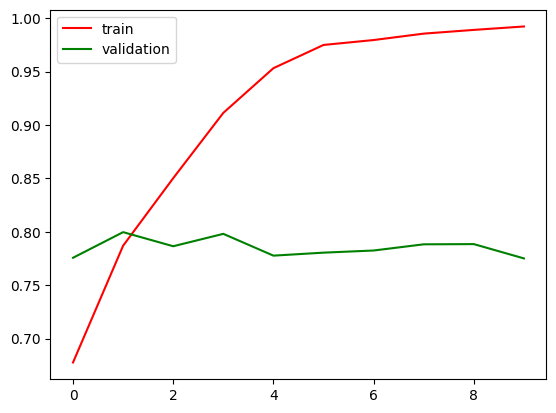

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='green',label='validation')
plt.legend()
plt.show()




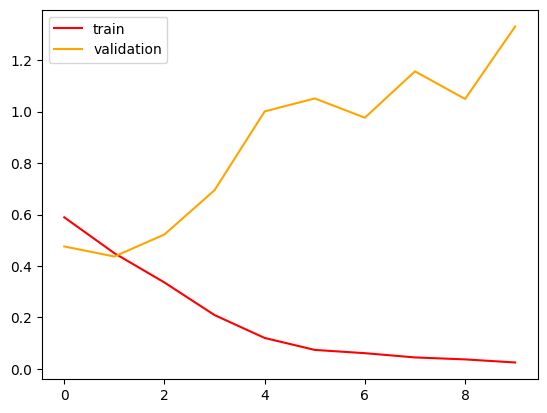

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='orange',label='validation')
plt.legend()
plt.show()

In [13]:
#ways to reduce overfitting

# Add more data
# Dropout
# Batch Norm
# Data Augmentation

In [14]:
import cv2

In [15]:
test_img = cv2.imread('/content/CaT PIC-2.jpg')

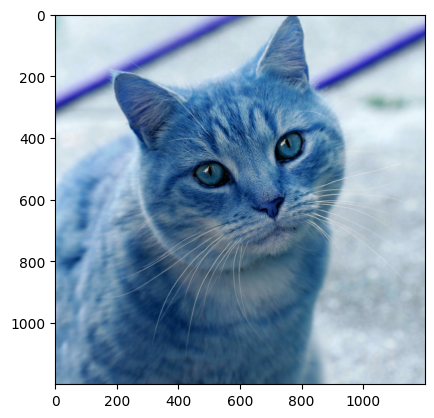

In [16]:
plt.imshow(test_img)

In [17]:
test_img.shape

(1199, 1200, 3)

In [18]:
test_img = cv2.resize(test_img,(256,256))

In [19]:
test_input = test_img.reshape((1,256,256,3))

In [20]:
model.predict(test_input)

1/1 [==============================] - 0s 376ms/step


array([[0.]], dtype=float32)

In [21]:
test_img = cv2.imread('/content/DOG PIC.jpg')

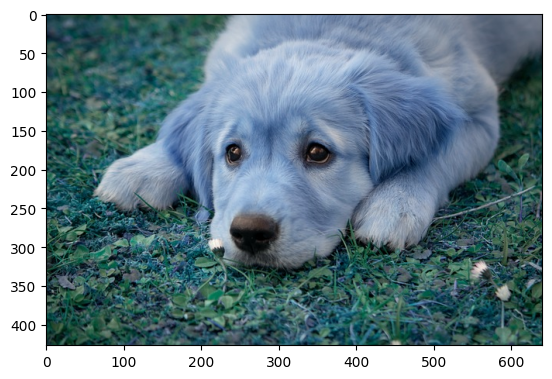

In [22]:
plt.imshow(test_img)

In [23]:
test_img.shape

(427, 640, 3)

In [24]:
test_img = cv2.resize(test_img,(256,256))

In [25]:
test_input = test_img.reshape((1,256,256,3))

In [26]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)